# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='beachwatch'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
stationcode,string,Short name for the station
stationgroup,string,First two characters of station code
sampledate,datetime,Date sample was taken
collectiontime,time,Time sample was taken
measure_code,integer,"Reference to the measure codes, the unique groups of analyte, mehodname and unit."
analyte,string,"The type of bacterial being measured, for coliform, total coliform, Enterococcus or E. coli."
methodname,string,"Method used to count bacteria, such as “MTF”, “SM 9222 B” or “Enterolert”"
unit,string,"Measurement units, type of count per 100 ml."
result,integer,Measured value
result_group_count,integer,Number of records in this measurement group


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,stationcode,stationgroup,sampledate,collectiontime,measure_code,analyte,methodname,unit,result,result_group_count,...,lresult_gt_lmedian,lresult_gt_lmean,lresult_lte_25pctl,lresult_gte_75pctl,labbatch,resultqualcode,qacode,sampleagency,labagency,submittingagency
0,EH-010,EH,1999-05-26,2018-09-27,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-5/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
1,EH-010,EH,1999-10-13,2018-09-27,0,"Coliform, Fecal",MTF,MPN/100 mL,0.0,213,...,0.0,0.0,0.0,0.0,SH-10/13/1999,=,NR,SDCDEH,SDCDEH,SDCDEH
2,EH-010,EH,1999-10-26,2018-09-27,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-10/26/1999,<,NR,SDCDEH,SDCDEH,SDCDEH
3,EH-010,EH,2000-03-21,2018-09-27,0,"Coliform, Fecal",MTF,MPN/100 mL,20.0,213,...,0.0,0.0,0.0,1.0,SH-3/21/2000,<,NR,SDCDEH,SDCDEH,SDCDEH
4,EH-010,EH,2000-05-24,2018-09-27,0,"Coliform, Fecal",MTF,MPN/100 mL,230.0,213,...,1.0,1.0,0.0,1.0,SH-5/24/2000,=,NR,SDCDEH,SDCDEH,SDCDEH


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,2
number,22
other,11


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 2 columns):
sampledate        202257 non-null datetime64[ns]
collectiontime    202257 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 3.1 MB


None

,count,unique,top,freq,first,last
sampledate,202257,3836,2005-09-06 00:00:00,260,1998-07-21 00:00:00,2013-12-31 00:00:00
collectiontime,202257,681,2018-09-27 00:00:00,57144,2018-09-27 00:00:00,2018-09-27 23:52:00


# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 22 columns):
measure_code            202257 non-null int64
result                  198271 non-null float64
result_group_count      202257 non-null int64
result_group_std        201846 non-null float64
result_group_mean       202222 non-null float64
result_group_25pctl     202222 non-null float64
result_group_median     202222 non-null float64
result_group_75pctl     202222 non-null float64
result_gt_median        202257 non-null float64
result_gt_mean          202257 non-null float64
result_lte_25pctl       202257 non-null float64
result_gte_75pctl       202257 non-null float64
lresult                 197910 non-null float64
lresult_group_std       201839 non-null float64
lresult_group_mean      202216 non-null float64
lresult_group_25pctl    202216 non-null float64
lresult_group_median    202216 non-null float64
lresult_group_75pctl    202216 non-null float64
lresult_gt_lmedian      20225

None

,count,mean,std,min,25%,50%,75%,max
measure_code,202257.0,12.996346,9.650773,0.0,5.000000,11.000000,24.000000,3.000000e+01
result,198271.0,22699.602226,573147.627822,-10.0,4.000000,20.000000,30.000000,2.800000e+07
result_group_count,202257.0,317.784650,220.945887,0.0,151.000000,260.000000,480.000000,1.081000e+03
result_group_std,201846.0,39280.771587,466989.179979,0.0,104.298619,408.002698,1617.302848,1.235900e+07
result_group_mean,202222.0,23009.275416,339992.334312,0.0,27.147143,87.562724,317.533333,1.430567e+07
result_group_25pctl,202222.0,791.780732,46347.590460,-1.0,2.000000,10.000000,20.000000,9.362500e+06
result_group_median,202222.0,6229.091187,169820.448045,0.0,4.000000,10.000000,20.000000,1.732900e+07
result_group_75pctl,202222.0,32921.367671,559376.433538,0.0,10.000000,20.000000,67.500000,2.419600e+07
result_gt_median,202257.0,0.327015,0.469124,0.0,0.000000,0.000000,1.000000,1.000000e+00
result_gt_mean,202257.0,0.118295,0.322958,0.0,0.000000,0.000000,0.000000,1.000000e+00


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


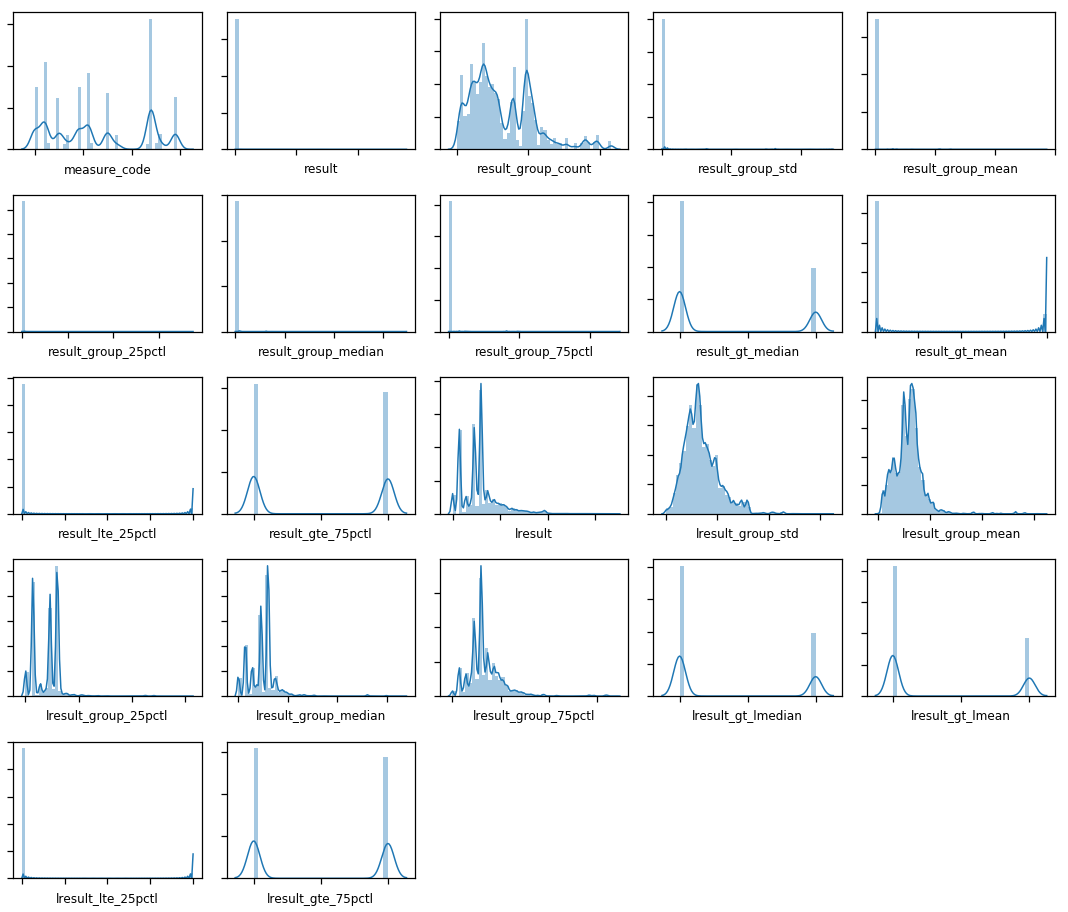

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

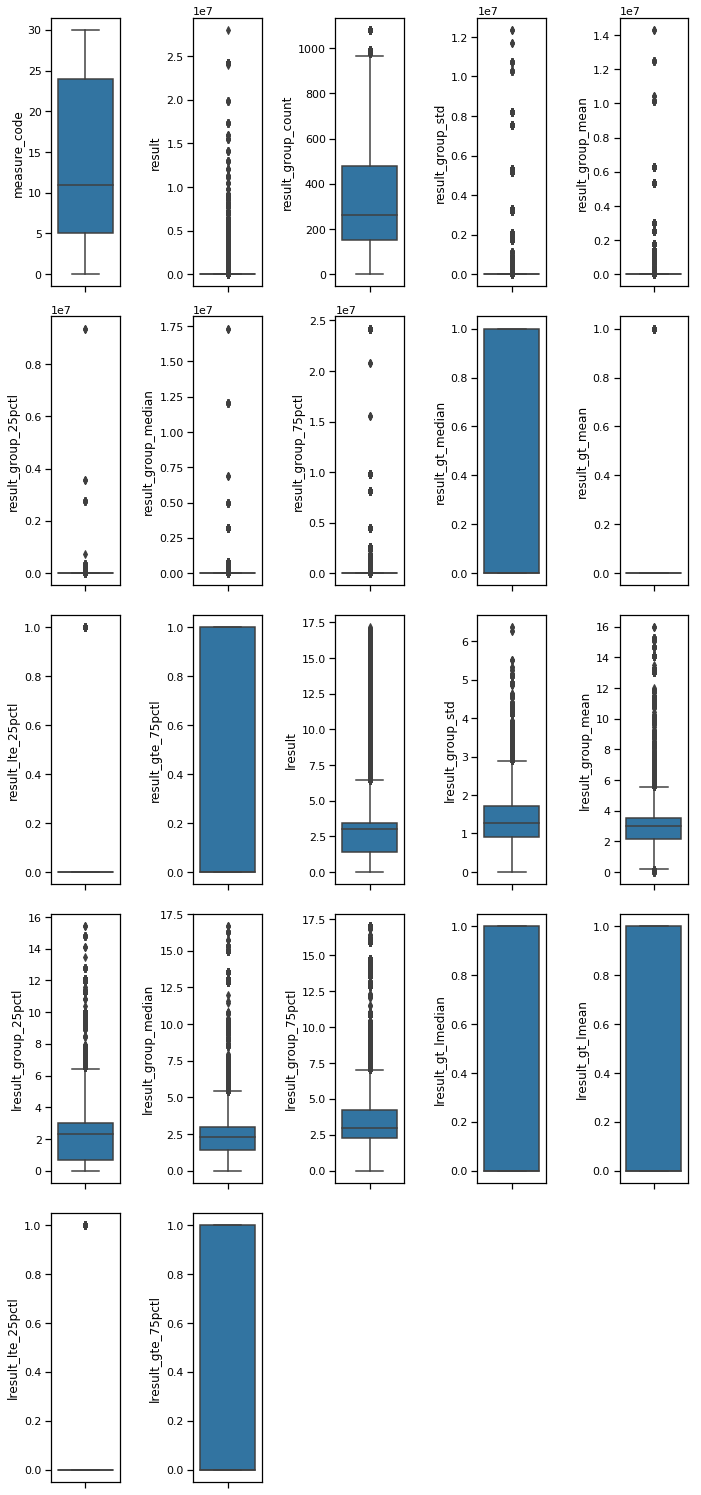

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

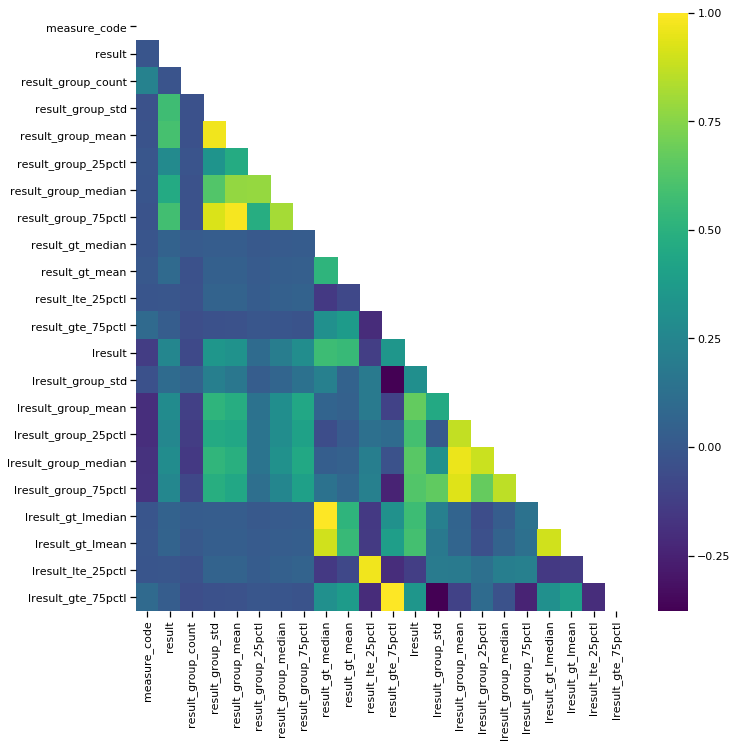

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202257 entries, 0 to 202256
Data columns (total 11 columns):
stationcode         202257 non-null object
stationgroup        202257 non-null object
analyte             202257 non-null object
methodname          202257 non-null object
unit                202257 non-null object
labbatch            202257 non-null object
resultqualcode      201920 non-null object
qacode              202257 non-null object
sampleagency        202257 non-null object
labagency           202257 non-null object
submittingagency    202257 non-null object
dtypes: object(11)
memory usage: 17.0+ MB


None

,count,unique,top,freq
stationcode,202257,172,IB-080,5065
stationgroup,202257,10,EH,61864
analyte,202257,4,"Coliform, Total",66992
methodname,202257,8,SM 9222 B,49791
unit,202257,2,MPN/100 mL,143346
labbatch,202257,9013,SD-11/2/2004,131
resultqualcode,201920,6,=,107776
qacode,202257,2,NR,174811
sampleagency,202257,11,SDCDEH,84275
labagency,202257,11,SDCDEH,84275


# Nulls


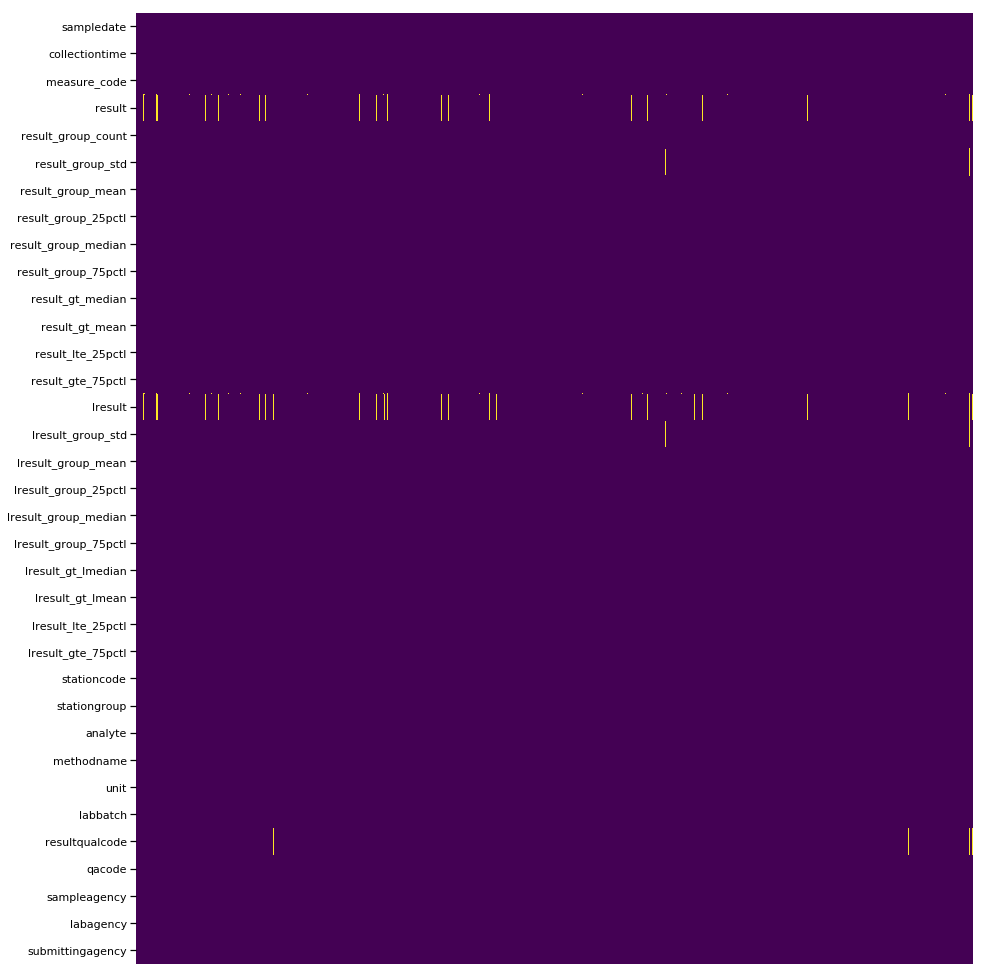

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )